In [25]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_recall_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import GridSearchCV

In [2]:
df1 = pd.read_csv("C:/Users/felip/Documents/DSMM_Application_Design_for_Big_Data_BDM_1034/dataset us accidents/US_Accidents_March23 - Copy.csv")

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [3]:
df1.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,7.728394e+06,7.728394e+06,7.728394e+06,4.325632e+06,4.325632e+06,7.728394e+06,7.564541e+06,5.729375e+06,7.554250e+06,7.587715e+06,7.551296e+06,7.157161e+06,5.524808e+06
mean,2.212384e+00,3.620119e+01,-9.470255e+01,3.626183e+01,-9.572557e+01,5.618423e-01,6.166329e+01,5.825105e+01,6.483104e+01,2.953899e+01,9.090376e+00,7.685490e+00,8.407210e-03
std,4.875313e-01,5.076079e+00,1.739176e+01,5.272905e+00,1.810793e+01,1.776811e+00,1.901365e+01,2.238983e+01,2.282097e+01,1.006190e+00,2.688316e+00,5.424983e+00,1.102246e-01
min,1.000000e+00,2.455480e+01,-1.246238e+02,2.456601e+01,-1.245457e+02,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.339963e+01,-1.172194e+02,3.346207e+01,-1.177543e+02,0.000000e+00,4.900000e+01,4.300000e+01,4.800000e+01,2.937000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.582397e+01,-8.776662e+01,3.618349e+01,-8.802789e+01,3.000000e-02,6.400000e+01,6.200000e+01,6.700000e+01,2.986000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.008496e+01,-8.035368e+01,4.017892e+01,-8.024709e+01,4.640000e-01,7.600000e+01,7.500000e+01,8.400000e+01,3.003000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,4.417500e+02,2.070000e+02,2.070000e+02,1.000000e+02,5.863000e+01,1.400000e+02,1.087000e+03,3.647000e+01


In [4]:
df1.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
df1.value_counts('Severity')

Severity
2    6156981
3    1299337
4     204710
1      67366
Name: count, dtype: int64

In [6]:
df1.value_counts('Weather_Condition')

Weather_Condition
Fair                           2560802
Mostly Cloudy                  1016195
Cloudy                          817082
Clear                           808743
Partly Cloudy                   698972
                                ...   
Heavy Smoke                          1
Heavy Freezing Rain / Windy          1
Heavy Rain Shower / Windy            1
Sand / Windy                         1
Partial Fog / Windy                  1
Name: count, Length: 144, dtype: int64

In [7]:
df_remo = pd.DataFrame(df1)
# drop the column at index 2, i.e. 'city'
df_remo = df1.drop(['City', 'State', 'ID', 'Source', 'County', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 
                    'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 
                    'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Amenity', 'Bump',
                    'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 
                    'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop'
], axis=1)
print(df_remo.head())

   Severity    Weather_Timestamp  Temperature(F)  Wind_Chill(F)  Humidity(%)  \
0         3  2016-02-08 05:58:00            36.9            NaN         91.0   
1         2  2016-02-08 05:51:00            37.9            NaN        100.0   
2         2  2016-02-08 06:56:00            36.0           33.3        100.0   
3         3  2016-02-08 07:38:00            35.1           31.0         96.0   
4         2  2016-02-08 07:53:00            36.0           33.3         89.0   

   Pressure(in)  Visibility(mi) Wind_Direction  Wind_Speed(mph)  \
0         29.68            10.0           Calm              NaN   
1         29.65            10.0           Calm              NaN   
2         29.67            10.0             SW              3.5   
3         29.64             9.0             SW              4.6   
4         29.65             6.0             SW              3.5   

   Precipitation(in) Weather_Condition Sunrise_Sunset Civil_Twilight  \
0               0.02        Light Rain      

In [8]:
df_remo.columns = df_remo.columns.str.strip()

print("Tipos de datos:", df_remo.dtypes)

Tipos de datos: Severity                   int64
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Sunrise_Sunset            object
Civil_Twilight            object
Nautical_Twilight         object
Astronomical_Twilight     object
dtype: object


In [9]:
df_remo.head()

,Severity,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,Night,Night,Night,Night
1,2,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,Night,Night,Night,Day
2,2,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,Night,Night,Day,Day
3,3,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,Night,Day,Day,Day
4,2,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,Day,Day,Day,Day


In [10]:
null_counts = df_remo.isnull().sum()

# Mostrar un resumen general
print("Valores nulos por columna:")
print(null_counts)

Valores nulos por columna:
Severity                       0
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Sunrise_Sunset             23246
Civil_Twilight             23246
Nautical_Twilight          23246
Astronomical_Twilight      23246
dtype: int64


<Axes: >

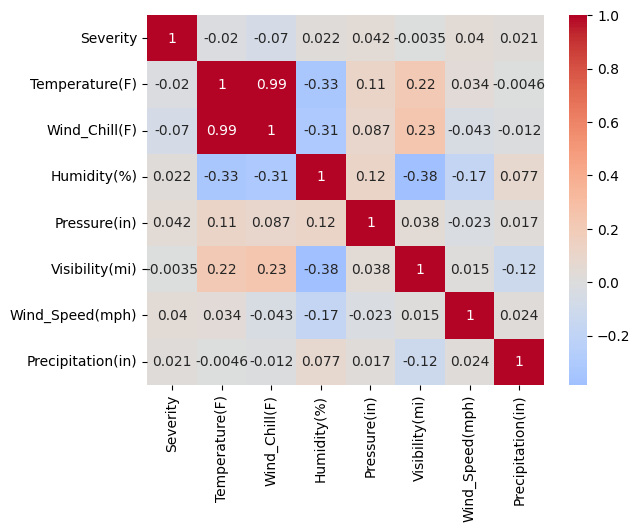

In [11]:
correlation_matrix = df_remo.corr(numeric_only=True)

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", center=0)

In [12]:
df_remo.shape

(7728394, 15)

In [13]:
data = df_remo.dropna()

null_counts_1 = data.isnull().sum()

# Mostrar un resumen general
print("Valores nulos por columna:")
print(null_counts_1)


Valores nulos por columna:
Severity                 0
Weather_Timestamp        0
Temperature(F)           0
Wind_Chill(F)            0
Humidity(%)              0
Pressure(in)             0
Visibility(mi)           0
Wind_Direction           0
Wind_Speed(mph)          0
Precipitation(in)        0
Weather_Condition        0
Sunrise_Sunset           0
Civil_Twilight           0
Nautical_Twilight        0
Astronomical_Twilight    0
dtype: int64


In [14]:
data.shape

(5217919, 15)

In [15]:
data.value_counts('Severity')

Severity
2    4446908
3     583878
4     125089
1      62044
Name: count, dtype: int64

In [16]:
df = data

# Seleccionar la clase mayoritaria (Severity 2)
mayoritaria = df[df['Severity'] == 2]

# Seleccionar el resto de las clases
resto = df[df['Severity'] != 2]

# Muestreo aleatorio para la clase mayoritaria
mayoritaria_muestreada = mayoritaria.sample(frac=0.1, random_state=42)

# Combinar la clase mayoritaria muestreada con el resto de las clases
df_muestreado = pd.concat([mayoritaria_muestreada, resto])

# Reordenar las filas del dataframe
df_muestreado = df_muestreado.sample(frac=1, random_state=42).reset_index(drop=True)

# Verificar la distribución de las clases
print(df_muestreado['Severity'].value_counts())

Severity
3    583878
2    444691
4    125089
1     62044
Name: count, dtype: int64


In [17]:
df_muestreado.shape

(1215702, 15)

<Axes: >

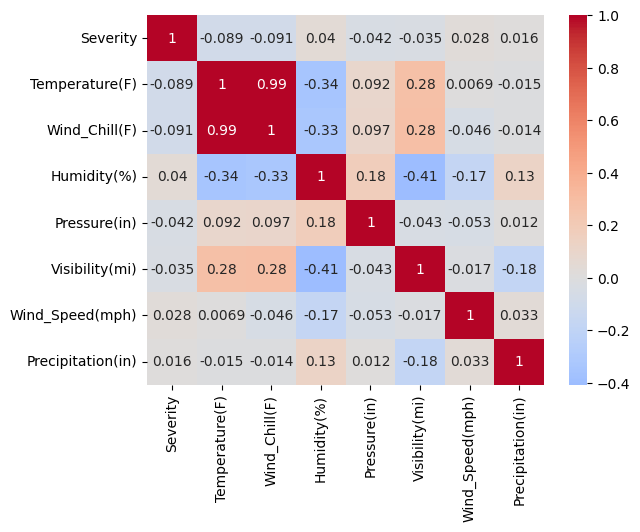

In [18]:
correlation_matrix_2 = df_muestreado.corr(numeric_only=True)

sns.heatmap(correlation_matrix_2, annot=True, cmap="coolwarm", center=0)

In [19]:
print(df_remo.shape)
print(df_remo.info())
print(df_muestreado.shape)
print(df_muestreado.info())


(7728394, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 15 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Severity               int64  
 1   Weather_Timestamp      object 
 2   Temperature(F)         float64
 3   Wind_Chill(F)          float64
 4   Humidity(%)            float64
 5   Pressure(in)           float64
 6   Visibility(mi)         float64
 7   Wind_Direction         object 
 8   Wind_Speed(mph)        float64
 9   Precipitation(in)      float64
 10  Weather_Condition      object 
 11  Sunrise_Sunset         object 
 12  Civil_Twilight         object 
 13  Nautical_Twilight      object 
 14  Astronomical_Twilight  object 
dtypes: float64(7), int64(1), object(7)
memory usage: 884.4+ MB
None
(1215702, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215702 entries, 0 to 1215701
Data columns (total 15 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------

# Random Forest Classifier

In [20]:
data = df_remo

# Identify categorical and numerical variables
categorical_cols = ['Wind_Direction', 'Weather_Condition', 
                    'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
numerical_cols = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 
                  'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

# Remove rows with missing values ​​(you can adjust as needed)
data = data.dropna()

# Coding of categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Define features (X) and the target variable (y)
X = data[categorical_cols + numerical_cols]
y = data['Severity']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Importance of features
importances = model.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importances.sort_values(by='Importance', ascending=False))


C:\Users\felip\AppData\Local\Temp\ipykernel_20100\48996752.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
C:\Users\felip\AppData\Local\Temp\ipykernel_20100\48996752.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = le.fit_transform(data[col])
C:\Users\felip\AppData\Local\Temp\ipykernel_20100\48996752.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

Accuracy: 0.8449957071016804

Classification Report:
               precision    recall  f1-score   support

           1       0.51      0.27      0.35     12421
           2       0.87      0.96      0.91    889445
           3       0.42      0.15      0.22    116819
           4       0.37      0.18      0.24     24899

    accuracy                           0.84   1043584
   macro avg       0.54      0.39      0.43   1043584
weighted avg       0.80      0.84      0.81   1043584

                  Feature  Importance
9            Pressure(in)    0.283125
8             Humidity(%)    0.200939
0          Wind_Direction    0.110955
11        Wind_Speed(mph)    0.108274
7           Wind_Chill(F)    0.096340
6          Temperature(F)    0.092907
10         Visibility(mi)    0.036766
1       Weather_Condition    0.036665
12      Precipitation(in)    0.015599
2          Sunrise_Sunset    0.007983
3          Civil_Twilight    0.005008
4       Nautical_Twilight    0.003325
5   Astronomical_

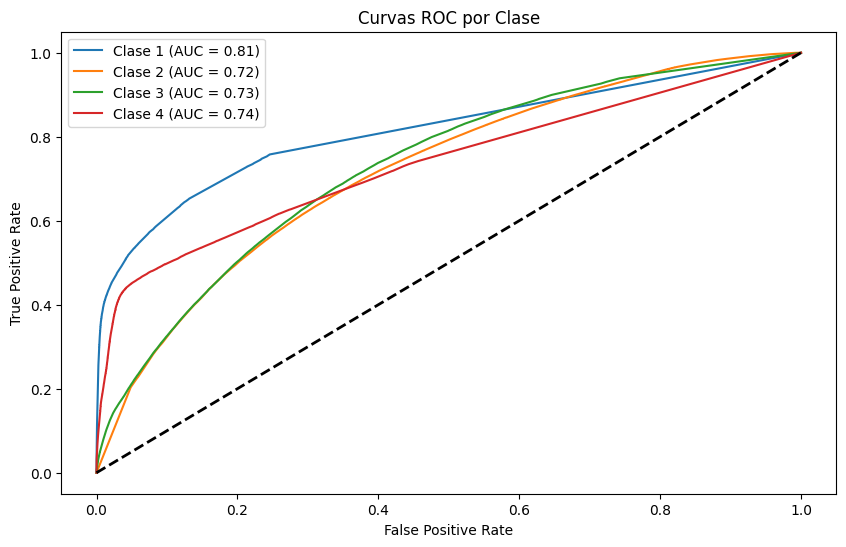

In [21]:
# Binarizar las etiquetas
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3, 4])
y_pred_proba = model.predict_proba(X_test)

# Curvas ROC por clase
plt.figure(figsize=(10, 6))
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f"Clase {i + 1} (AUC = {auc(fpr, tpr):.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC por Clase")
plt.legend(loc="best")
plt.show()


# Random Forest Classifier balanceado

Accuracy: 0.5794621228011729

Classification Report:
               precision    recall  f1-score   support

           1       0.65      0.38      0.48     12561
           2       0.52      0.47      0.50     89112
           3       0.60      0.72      0.66    116445
           4       0.64      0.39      0.49     25023

    accuracy                           0.58    243141
   macro avg       0.60      0.49      0.53    243141
weighted avg       0.58      0.58      0.57    243141

                  Feature  Importance
9            Pressure(in)    0.262662
8             Humidity(%)    0.195689
0          Wind_Direction    0.111911
7           Wind_Chill(F)    0.107635
6          Temperature(F)    0.104737
11        Wind_Speed(mph)    0.104387
1       Weather_Condition    0.041174
10         Visibility(mi)    0.035430
12      Precipitation(in)    0.013994
2          Sunrise_Sunset    0.008635
3          Civil_Twilight    0.005418
4       Nautical_Twilight    0.004288
5   Astronomical_

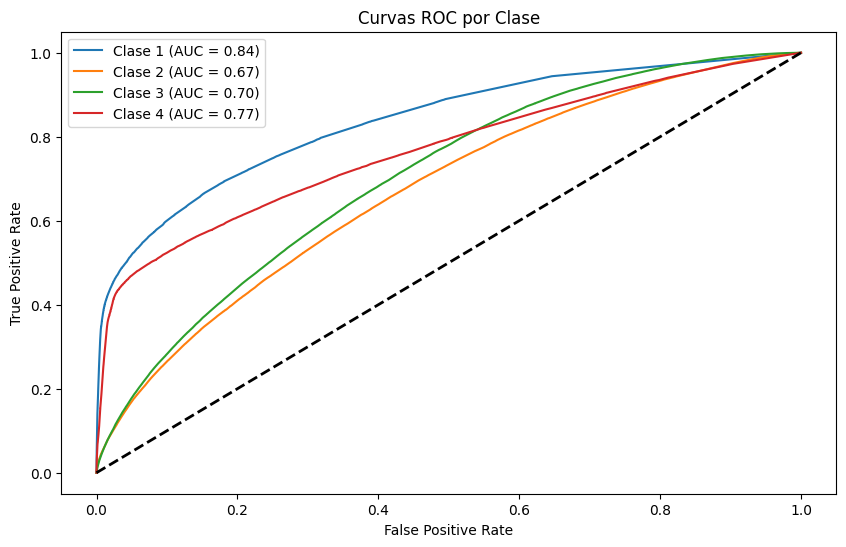

In [22]:
data1 = df_muestreado

# Identify categorical and numerical variables
categorical_cols = ['Wind_Direction', 'Weather_Condition', 
                    'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
numerical_cols = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 
                  'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

# Remove rows with missing values ​​(you can adjust as needed)
data1 = data1.dropna()

# Coding of categorical variables
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    data1[col] = le.fit_transform(data1[col])
    label_encoders[col] = le

# Define features (X) and the target variable (y)
X = data1[categorical_cols + numerical_cols]
y = data1['Severity']

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Model
model_2 = RandomForestClassifier(random_state=42, n_estimators=100)
model_2.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model_2.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Importance of features
importances = model_2.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print(feature_importances.sort_values(by='Importance', ascending=False))

y_test_binarized = label_binarize(y_test, classes=[1, 2, 3, 4])
y_pred_proba = model_2.predict_proba(X_test)

# Curvas ROC por clase
plt.figure(figsize=(10, 6))
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f"Clase {i + 1} (AUC = {auc(fpr, tpr):.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC por Clase")
plt.legend(loc="best")
plt.show()

Fitting 3 folds for each of 16 candidates, totalling 48 fits


C:\Users\felip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Mejores hiperparámetros encontrados:
{'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}

Accuracy después de optimización: 0.55060643823954

Classification Report:
               precision    recall  f1-score   support

           1       0.71      0.10      0.17     12561
           2       0.53      0.41      0.46     89112
           3       0.56      0.80      0.66    116445
           4       0.71      0.12      0.20     25023

    accuracy                           0.55    243141
   macro avg       0.63      0.36      0.37    243141
weighted avg       0.57      0.55      0.51    243141


Importancia de características:
                   Feature  Importance
9            Pressure(in)    0.242262
8             Humidity(%)    0.154842
7           Wind_Chill(F)    0.114743
6          Temperature(F)    0.110760
0          Wind_Direction    0.096896
11        Wind_Speed(mph)    0.090416
1       Weather_Condition    0.063094
10      

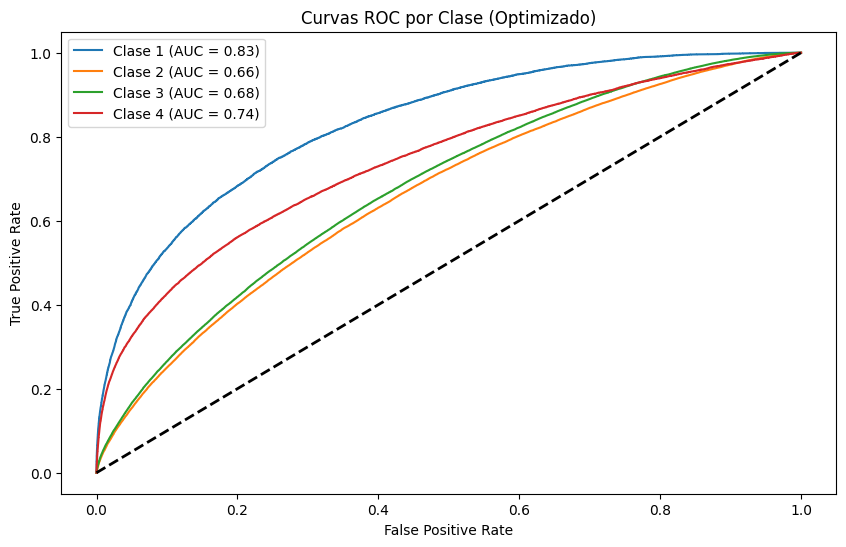

In [24]:
# Hiperparámetros para GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True]
}

# Configuración del modelo y búsqueda
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Entrenamiento
grid_search.fit(X_train, y_train)

# Mejor configuración
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

# Modelo optimizado
best_rf = grid_search.best_estimator_

# Predicciones
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)

# Evaluación
print("\nAccuracy después de optimización:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Importancia de características
importances = best_rf.feature_importances_
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
print("\nImportancia de características:\n", feature_importances.sort_values(by='Importance', ascending=False))

# Curvas ROC
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3, 4])
plt.figure(figsize=(10, 6))
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f"Clase {i + 1} (AUC = {auc(fpr, tpr):.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC por Clase (Optimizado)")
plt.legend(loc="best")
plt.show()


#  ⁠XGB - extreme gradient booster

In [24]:
data = df_remo

# Identify categorical and numerical variables
categorical_cols = ['City', 'State', 'Wind_Direction', 'Weather_Condition', 
                    'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
numerical_cols = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 
                  'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

# Separate the predictor variables (X) and the target (y)
X = data[categorical_cols + numerical_cols]
y = data['Severity'] - 1

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: OneHot encoding for categoricals
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)

# Create pipeline with preprocessing and XGBoost model
xgb_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        objective='multi:softmax', 
        learning_rate=0.1, 
        n_estimators=100, 
        max_depth=6, 
        random_state=42,
        use_label_encoder=False
    ))
])

# Train the model
xgb_model.fit(X_train, y_train)

# Predictions
y_pred = xgb_model.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Importance of features
classifier = xgb_model.named_steps['classifier']
feature_importances = classifier.feature_importances_

# Extract feature names from preprocessor
ohe_categories = xgb_model.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
feature_names = list(ohe_categories) + numerical_cols

C:\Users\felip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [10:17:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.80140831311029

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.00      0.00     13509
           1       0.80      0.99      0.89   1230523
           2       0.64      0.06      0.11    260525
           3       0.84      0.01      0.02     41122

    accuracy                           0.80   1545679
   macro avg       0.76      0.26      0.25   1545679
weighted avg       0.78      0.80      0.73   1545679



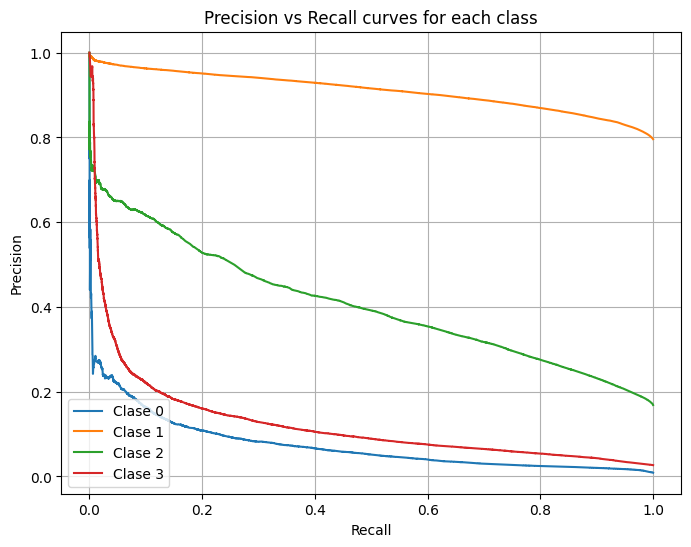

In [25]:
# Get the prediction probabilities for each class
y_probs = xgb_model.predict_proba(X_test)

# Initialize the figure for the graph
plt.figure(figsize=(8, 6))

# Plot Precision-Recall for each class
for i in range(y_probs.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test == i, y_probs[:, i])
    plt.plot(recall, precision, label=f'Clase {i}')

# Tags and Title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall curves for each class')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


C:\Users\felip\AppData\Local\Temp\ipykernel_4460\102249966.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class_1_probs, shade=True, color='b', label='Clase 1')


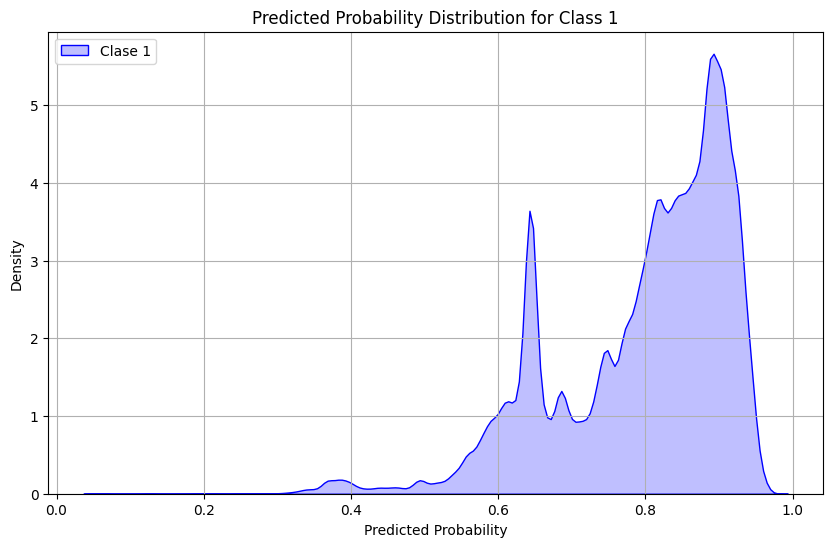

In [26]:
y_probs = xgb_model.predict_proba(X_test)

# Select the probabilities for the class of interest (for example, class 1)
# If you want a general distribution for all classes, you can iterate over each one
class_1_probs = y_probs[:, 1] 

# Creating the KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(class_1_probs, shade=True, color='b', label='Clase 1')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Predicted Probability Distribution for Class 1') 
plt.legend()
plt.grid(True)
plt.show()

C:\Users\felip\AppData\Local\Temp\ipykernel_4460\368222807.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_probs[:, i], shade=True, color=colors[i], label=class_labels[i])
C:\Users\felip\AppData\Local\Temp\ipykernel_4460\368222807.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_probs[:, i], shade=True, color=colors[i], label=class_labels[i])
C:\Users\felip\AppData\Local\Temp\ipykernel_4460\368222807.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_probs[:, i], shade=True, color=colors[i], label=class_labels[i])
C:\Users\felip\AppData\Local\Temp\ipykernel_4460\368222807.py:11: FutureWarning: 

`shade` 

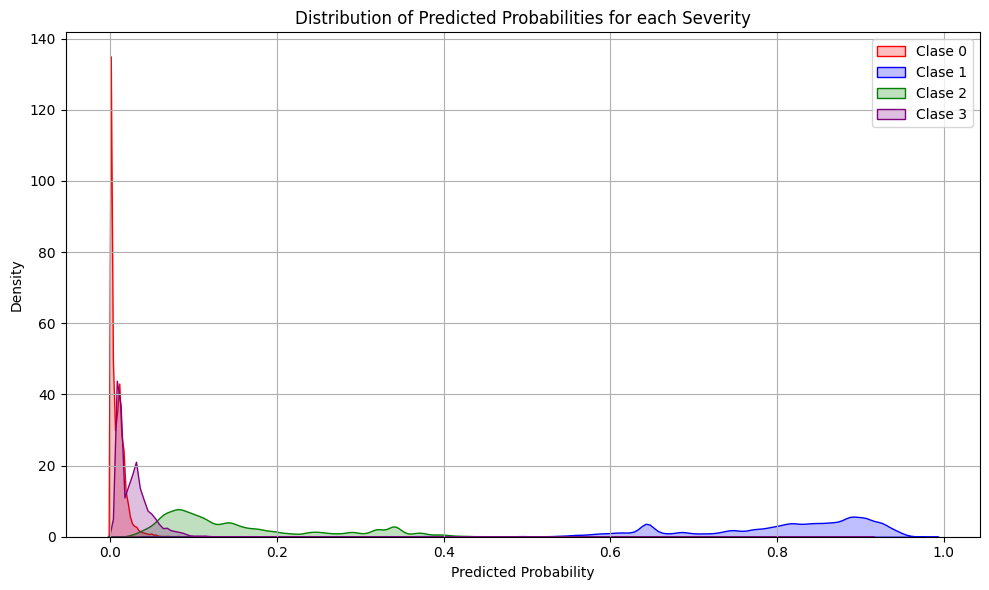

In [27]:
# Get the prediction probabilities for each class
y_probs = xgb_model.predict_proba(X_test)

# Create a list of colors for each class
colors = ['red', 'blue', 'green', 'purple']
class_labels = ['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3']

# Create the KDE graph for each class
plt.figure(figsize=(10, 6))
for i in range(y_probs.shape[1]):
    sns.kdeplot(y_probs[:, i], shade=True, color=colors[i], label=class_labels[i])

plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Distribution of Predicted Probabilities for each Severity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#  ⁠XGB - extreme gradient booster balanceado

In [28]:
data1 = df_muestreado

# Identify categorical and numerical variables
categorical_cols = ['City', 'State', 'Wind_Direction', 'Weather_Condition', 
                    'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
numerical_cols = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 
                  'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

# Separate the predictor variables (X) and the target (y)
X = data1[categorical_cols + numerical_cols]
y = data1['Severity'] - 1

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing: OneHot encoding for categoricals
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numerical_cols)
    ]
)

# Create pipeline with preprocessing and XGBoost model
xgb_model_2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(
        objective='multi:softmax', 
        learning_rate=0.1, 
        n_estimators=100, 
        max_depth=6, 
        random_state=42,
        use_label_encoder=False
    ))
])

# Train the model
xgb_model_2.fit(X_train, y_train)

# Predictions
y_pred = xgb_model_2.predict(X_test)

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Importance of features
classifier = xgb_model_2.named_steps['classifier']
feature_importances = classifier.feature_importances_

# Extract feature names from preprocessor
ohe_categories = xgb_model_2.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_cols)
feature_names = list(ohe_categories) + numerical_cols

C:\Users\felip\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\xgboost\core.py:158: UserWarning: [10:20:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.5812100797479651

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.08      0.14     12561
           1       0.57      0.51      0.54     89112
           2       0.59      0.80      0.68    116445
           3       0.54      0.09      0.16     25023

    accuracy                           0.58    243141
   macro avg       0.57      0.37      0.38    243141
weighted avg       0.58      0.58      0.54    243141



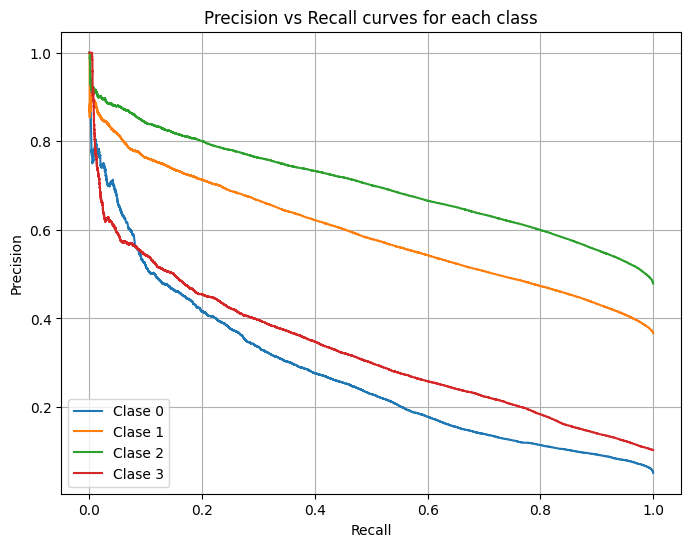

In [29]:
# Get the prediction probabilities for each class
y_probs = xgb_model_2.predict_proba(X_test)

# Initialize the figure for the graph
plt.figure(figsize=(8, 6))

# Plot Precision-Recall for each class
for i in range(y_probs.shape[1]):
    precision, recall, _ = precision_recall_curve(y_test == i, y_probs[:, i])
    plt.plot(recall, precision, label=f'Clase {i}')

# Tags and Title
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall curves for each class')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

C:\Users\felip\AppData\Local\Temp\ipykernel_4460\58599157.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(class_1_probs, shade=True, color='b', label='Clase 1')


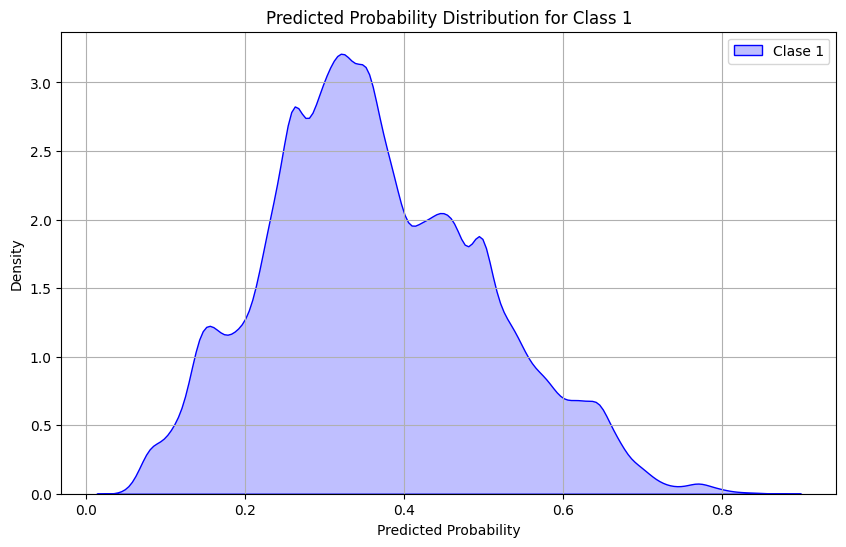

In [30]:
y_probs = xgb_model_2.predict_proba(X_test)

# Select the probabilities for the class of interest (for example, class 1)
# If you want a general distribution for all classes, you can iterate over each one
class_1_probs = y_probs[:, 1] 

# Creating the KDE Plot
plt.figure(figsize=(10, 6))
sns.kdeplot(class_1_probs, shade=True, color='b', label='Clase 1')
plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Predicted Probability Distribution for Class 1') 
plt.legend()
plt.grid(True)
plt.show()

C:\Users\felip\AppData\Local\Temp\ipykernel_4460\2393133716.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_probs[:, i], shade=True, color=colors[i], label=class_labels[i])
C:\Users\felip\AppData\Local\Temp\ipykernel_4460\2393133716.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_probs[:, i], shade=True, color=colors[i], label=class_labels[i])
C:\Users\felip\AppData\Local\Temp\ipykernel_4460\2393133716.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_probs[:, i], shade=True, color=colors[i], label=class_labels[i])
C:\Users\felip\AppData\Local\Temp\ipykernel_4460\2393133716.py:11: FutureWarning: 

`sha

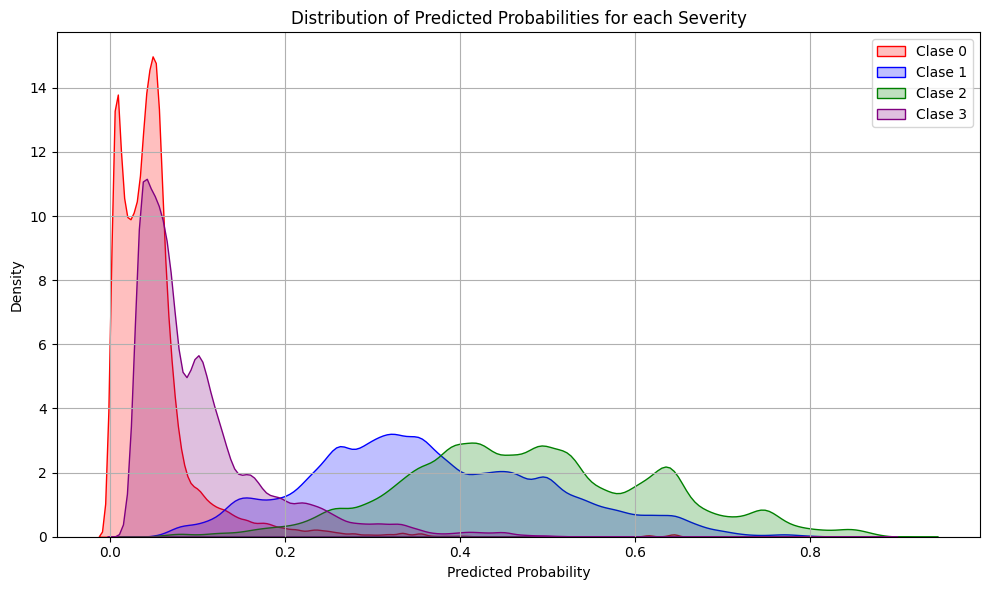

In [31]:
# Get the prediction probabilities for each class
y_probs = xgb_model_2.predict_proba(X_test)

# Create a list of colors for each class
colors = ['red', 'blue', 'green', 'purple']
class_labels = ['Clase 0', 'Clase 1', 'Clase 2', 'Clase 3']

# Create the KDE graph for each class
plt.figure(figsize=(10, 6))
for i in range(y_probs.shape[1]):
    sns.kdeplot(y_probs[:, i], shade=True, color=colors[i], label=class_labels[i])

plt.xlabel('Predicted Probability')
plt.ylabel('Density')
plt.title('Distribution of Predicted Probabilities for each Severity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Decision tree


Accuracy: 0.8002386006408834

Classification Report:
               precision    recall  f1-score   support

           1       0.48      0.00      0.00     13509
           2       0.80      0.99      0.89   1230523
           3       0.60      0.06      0.10    260525
           4       0.83      0.00      0.01     41122

    accuracy                           0.80   1545679
   macro avg       0.68      0.26      0.25   1545679
weighted avg       0.77      0.80      0.72   1545679



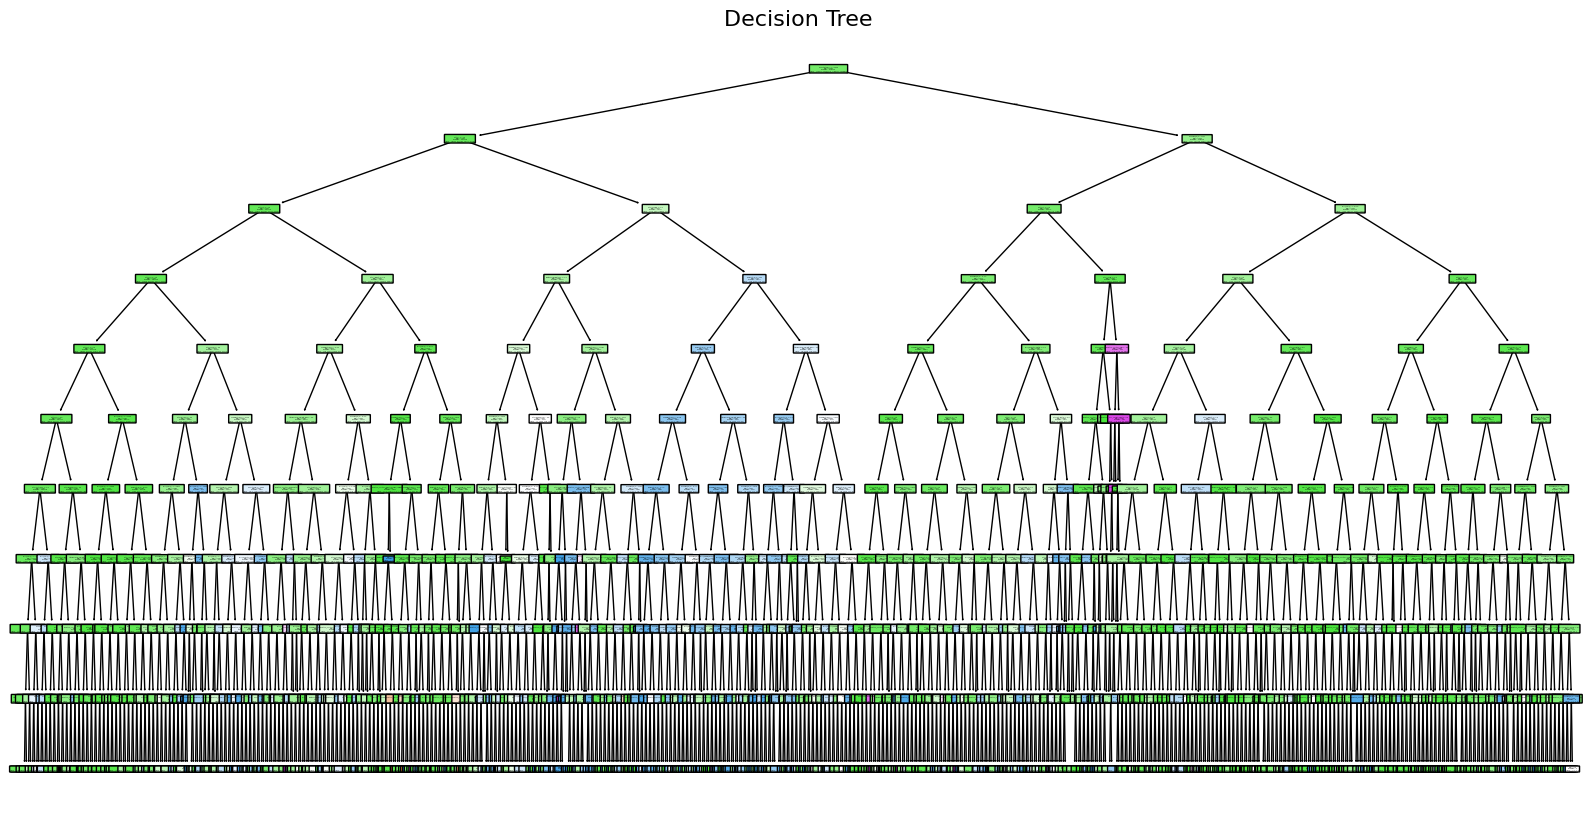

In [32]:
data = df_remo
# Identify categorical and numerical variables
categorical_cols = ['City', 'State', 'Wind_Direction', 'Weather_Condition', 
                    'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
numerical_cols = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 
                  'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

# Separate the predictor variables (X) and the target (y)
X = data[categorical_cols + numerical_cols]
y = data['Severity']

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputers to fill in missing values
categorical_imputer = SimpleImputer(strategy='most_frequent')  # Fill in the categorical statements with the most frequent value
numerical_imputer = SimpleImputer(strategy='mean')             # Fill in the numbers with the average

# Preprocessing: Imputation + OneHotEncoder + StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline(steps=[
            ('imputer', categorical_imputer),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols),
        ('num', Pipeline(steps=[
            ('imputer', numerical_imputer),
            ('scaler', StandardScaler())
        ]), numerical_cols)
    ]
)

# Create the pipeline with the preprocessor and classifier
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        criterion='gini',
        max_depth=10,
        random_state=42
    ))
])

# Train the model
decision_tree_pipeline.fit(X_train, y_train)

# Predictions
y_pred = decision_tree_pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# View the decision tree
classifier = decision_tree_pipeline.named_steps['classifier']
plt.figure(figsize=(20, 10))
plot_tree(
    classifier, 
    feature_names=(decision_tree_pipeline.named_steps['preprocessor']
                   .named_transformers_['cat']
                   .named_steps['encoder']
                   .get_feature_names_out(categorical_cols).tolist() + numerical_cols),
    class_names=[str(c) for c in classifier.classes_],
    filled=True,
    rounded=True
)
plt.title("Decision Tree", fontsize=16)
plt.show()



# Decision tree balanceado

Accuracy: 0.5499566095393208

Classification Report:
               precision    recall  f1-score   support

           1       0.48      0.07      0.12     12561
           2       0.55      0.45      0.49     89112
           3       0.55      0.80      0.65    116445
           4       0.81      0.01      0.02     25023

    accuracy                           0.55    243141
   macro avg       0.60      0.33      0.32    243141
weighted avg       0.57      0.55      0.50    243141



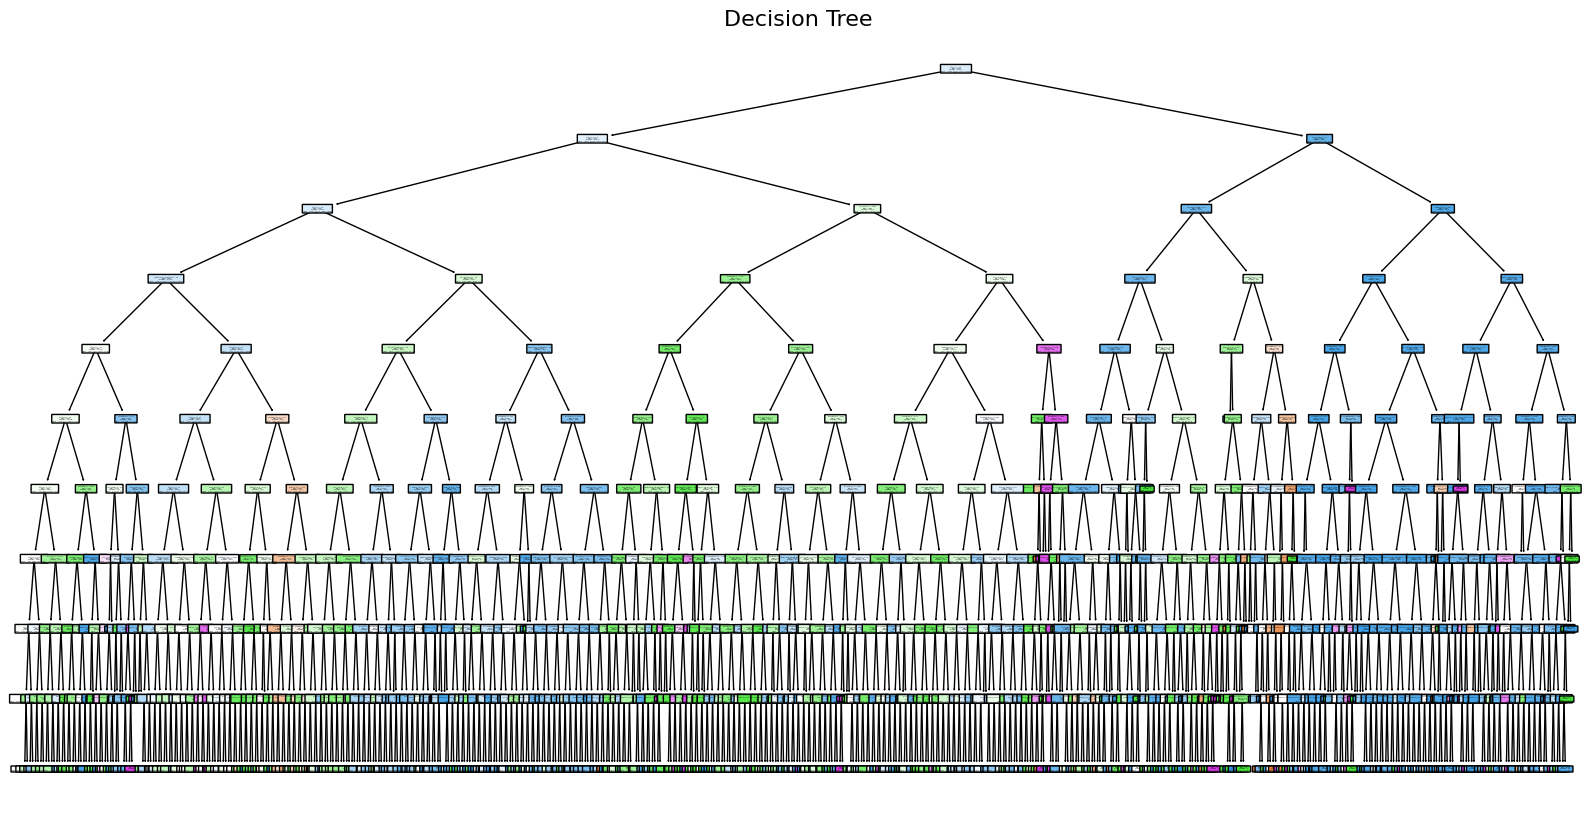

In [33]:
data1 = df_muestreado
# Identify categorical and numerical variables
categorical_cols = ['City', 'State', 'Wind_Direction', 'Weather_Condition', 
                    'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
numerical_cols = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 
                  'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

# Separate the predictor variables (X) and the target (y)
X = data1[categorical_cols + numerical_cols]
y = data1['Severity']

# Split the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Imputers to fill in missing values
categorical_imputer = SimpleImputer(strategy='most_frequent')  # Fill in the categorical statements with the most frequent value
numerical_imputer = SimpleImputer(strategy='mean')             # Fill in the numbers with the average

# Preprocessing: Imputation + OneHotEncoder + StandardScaler
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', Pipeline(steps=[
            ('imputer', categorical_imputer),
            ('encoder', OneHotEncoder(handle_unknown='ignore'))
        ]), categorical_cols),
        ('num', Pipeline(steps=[
            ('imputer', numerical_imputer),
            ('scaler', StandardScaler())
        ]), numerical_cols)
    ]
)

# Create the pipeline with the preprocessor and classifier
decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(
        criterion='gini',
        max_depth=10,
        random_state=42
    ))
])

# Train the model
decision_tree_pipeline.fit(X_train, y_train)

# Predictions
y_pred = decision_tree_pipeline.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# View the decision tree
classifier = decision_tree_pipeline.named_steps['classifier']
plt.figure(figsize=(20, 10))
plot_tree(
    classifier, 
    feature_names=(decision_tree_pipeline.named_steps['preprocessor']
                   .named_transformers_['cat']
                   .named_steps['encoder']
                   .get_feature_names_out(categorical_cols).tolist() + numerical_cols),
    class_names=[str(c) for c in classifier.classes_],
    filled=True,
    rounded=True
)
plt.title("Decision Tree", fontsize=16)
plt.show()

# KNN

Classification Report:
               precision    recall  f1-score   support

           1       0.18      0.12      0.14      1272
           2       0.41      0.49      0.45      8857
           3       0.53      0.57      0.55     11704
           4       0.22      0.05      0.08      2481

    accuracy                           0.46     24314
   macro avg       0.34      0.30      0.30     24314
weighted avg       0.44      0.46      0.44     24314



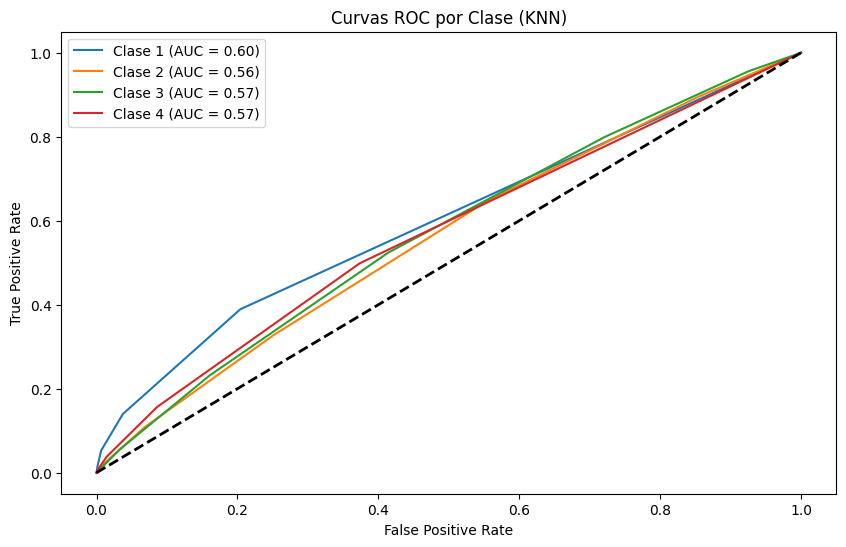

In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_curve, auc
import matplotlib.pyplot as plt

# Paso 1: Usar el dataset df_remo y seleccionar las columnas relevantes
data_sampled = df_muestreado.sample(frac=0.1 , random_state=42)  # Tomar 1% del dataset para hacerlo manejable
data_sampled[numerical_cols] = data_sampled[numerical_cols].fillna(0)  # Reemplazar NaN con 0
data_sampled[categorical_cols] = data_sampled[categorical_cols].fillna('Desconocido')  # Reemplazar NaN con "Desconocido"

categorical_cols = ['Wind_Direction', 'Weather_Condition', 
                    'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
numerical_cols = ['Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 
                  'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

X_sampled = data_sampled[categorical_cols + numerical_cols]
y_sampled = data_sampled['Severity']  # Columna objetivo

# Paso 2: Codificación de variables categóricas
X_sampled = pd.get_dummies(X_sampled, drop_first=True)  # Convertir variables categóricas a dummies

# Paso 3: Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_sampled, y_sampled, test_size=0.2, random_state=42)

# Paso 4: Normalizar las características numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Paso 5: Entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # Usar distancia Euclidiana
knn.fit(X_train, y_train)

# Paso 6: Hacer predicciones y evaluar el modelo
y_pred = knn.predict(X_test)
y_pred_proba = knn.predict_proba(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))

# Paso 7: Generar curvas ROC por clase
y_test_binarized = label_binarize(y_test, classes=[1, 2, 3, 4])

plt.figure(figsize=(10, 6))
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    plt.plot(fpr, tpr, label=f"Clase {i + 1} (AUC = {auc(fpr, tpr):.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC por Clase (KNN)")
plt.legend(loc="best")
plt.show()


# Aditionals

In [ ]:
# Create new features
df_remo['Weather_Severity_Index'] = (df_remo['Temperature(F)'] + df_remo['Wind_Chill(F)']) * df_remo['Humidity(%)'] / 100

df_remo['Precipitation_Visibility_Ratio'] = df_remo['Precipitation(in)'] / (df_remo['Visibility(mi)'] + 1)

df_remo['Pressure_Temperature_Diff'] = df_remo['Pressure(in)'] - df_remo['Temperature(F)']

# Create dummies for Wind_Direction and combine them with Wind_Speed
wind_dummies = pd.get_dummies(df_remo['Wind_Direction'], prefix='Wind')
for col in wind_dummies.columns:
    df_remo[f'{col}_Speed'] = wind_dummies[col] * df_remo['Wind_Speed(mph)']

# Weather_Condition grouping
weather_mapping = {
    'Rain': 'Rain', 'Heavy Rain': 'Rain', 'Light Rain': 'Rain',
    'Snow': 'Snow', 'Heavy Snow': 'Snow', 'Light Snow': 'Snow',
    'Clear': 'Clear', 'Cloudy': 'Cloudy', 'Overcast': 'Cloudy',
    # Add other relevant categories
}
df_remo['General_Weather_Condition'] = df_remo['Weather_Condition'].map(weather_mapping)

In [ ]:
df_remo['Precipitation_Visibility_Ratio'] = df_remo['Precipitation(in)'] / (df_remo['Visibility(mi)'] + 1)

df_remo['Pressure_Temperature_Diff'] = df_remo['Pressure(in)'] - df_remo['Temperature(F)']

# Create dummies for Wind_Direction and combine them with Wind_Speed
wind_dummies = pd.get_dummies(df_remo['Wind_Direction'], prefix='Wind')
for col in wind_dummies.columns:
    df_remo[f'{col}_Speed'] = wind_dummies[col] * df_remo['Wind_Speed(mph)']

# Weather_Condition grouping
weather_mapping = {
    'Rain': 'Rain', 'Heavy Rain': 'Rain', 'Light Rain': 'Rain',
    'Snow': 'Snow', 'Heavy Snow': 'Snow', 'Light Snow': 'Snow',
    'Clear': 'Clear', 'Cloudy': 'Cloudy', 'Overcast': 'Cloudy',
    # Add other relevant categories
}
df_remo['General_Weather_Condition'] = df_remo['Weather_Condition'].map(weather_mapping)

In [ ]:
correlations = df_remo[['Weather_Severity_Index', 'Precipitation_Visibility_Ratio', 'Pressure_Temperature_Diff', 'Severity']].corr()

sns.heatmap(correlations, annot=True, cmap="coolwarm", center=0)

In [ ]:
# Identify categorical and numerical variables
X = df_remo[['Weather_Severity_Index', 'Precipitation_Visibility_Ratio', 
        'Pressure_Temperature_Diff', 'Pressure(in)', 
        'Humidity(%)', 'Wind_Chill(F)', 'Temperature(F)', 
        'Wind_Speed(mph)', 'Visibility(mi)', 'Precipitation(in)']]
y = df_remo['Severity']

# Convert categorical variables to dummies (like 'City' if it is categorical)
X = pd.get_dummies(X, drop_first=True)

# Splitting into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))